In [61]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

In [63]:
# Melakukan Muat Data
df = pd.read_csv('StudentsPerformance.csv')

In [65]:
df.head(n = 1001)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [67]:
df.shape

(1000, 8)

In [69]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [71]:
# Pilih atribut atau fitur numerik untuk clustering
features = df[['math score', 'reading score', 'writing score']]

In [73]:
# 2. Pra-pemrosesan Data, melakukan normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [75]:
# 3. Perbandingan K-means Clustering
sse = []
silhouette_kmeans = []
silhouette_agg = []

In [77]:
k_range = range(2, 11)  # Uji untuk k = 2 hingga 10

for k in k_range:
    # K-means Clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_kmeans.append(silhouette_score(X_scaled, kmeans_labels))
    
    # Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg_clustering.fit_predict(X_scaled)
    silhouette_agg.append(silhouette_score(X_scaled, agg_labels))

In [10]:
 # Menampilkan Hasil
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'SSE')

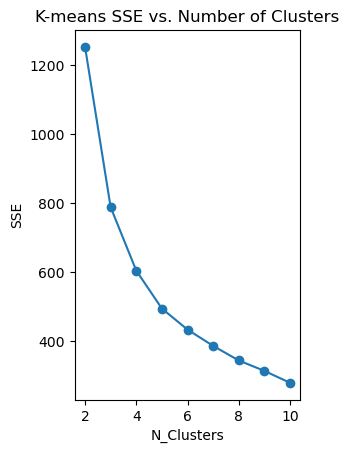

In [11]:
# Plot SSE untuk K-means
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('K-means SSE vs. Number of Clusters')
plt.xlabel('N_Clusters')
plt.ylabel('SSE')

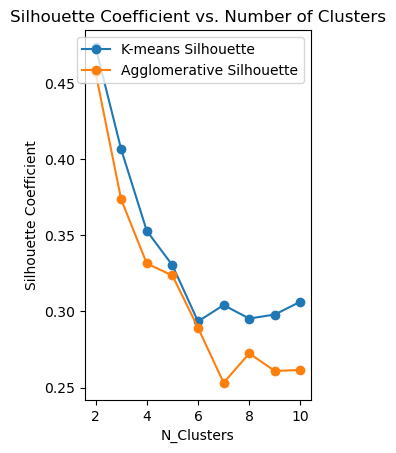

In [31]:
# Plot Silhouette Coefficient
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_kmeans, marker='o', label='K-means Silhouette')
plt.plot(k_range, silhouette_agg, marker='o', label='Agglomerative Silhouette')
plt.title('Silhouette Coefficient vs. Number of Clusters')
plt.xlabel('N_Clusters')
plt.ylabel('Silhouette Coefficient')
plt.legend()

plt.show()

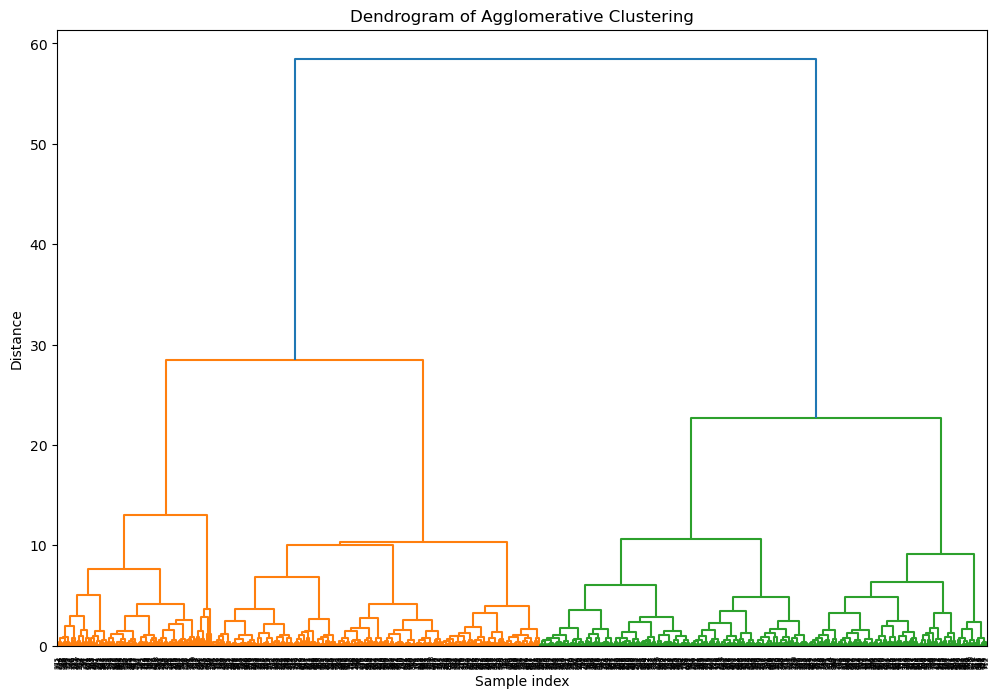

In [79]:
# Hitung Jarak Hirarki
# Menggunakan metode Ward untuk mengukur jarak
linked = sch.linkage(X_scaled, method='ward')

# Membuat Plot Dendrogram
plt.figure(figsize=(12, 8))
sch.dendrogram(linked, 
               orientation='top', 
               distance_sort='descending', 
               show_leaf_counts=True)
plt.title('Dendrogram of Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [59]:
# Penerapan Algoritma K-means
# Menentukan jumlah cluster
k = 4  # Pilih jumlah cluster, misalnya 4

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_sse = kmeans.inertia_
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print(f"K-means SSE: {kmeans_sse}")
print(f"K-means Silhouette Coefficient: {kmeans_silhouette}")

K-means SSE: 604.9240060963621
K-means Silhouette Coefficient: 0.3530512639723087


In [51]:
# Penerapan Algoritma K-means
# Menentukan jumlah cluster
k = 3  # Pilih jumlah cluster, misalnya 3

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_sse = kmeans.inertia_
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print(f"K-means SSE: {kmeans_sse}")
print(f"K-means Silhouette Coefficient: {kmeans_silhouette}")

K-means SSE: 788.7349569548237
K-means Silhouette Coefficient: 0.4066343611906909


In [53]:
# Penerapan Algoritma K-means
# Menentukan jumlah cluster
k = 2  # Pilih jumlah cluster, misalnya 2

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_sse = kmeans.inertia_
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print(f"K-means SSE: {kmeans_sse}")
print(f"K-means Silhouette Coefficient: {kmeans_silhouette}")

K-means SSE: 1253.8673348393431
K-means Silhouette Coefficient: 0.4740145216922465


In [55]:
# Hitung Centroid untuk Setiap Cluster
def compute_centroids(X, labels, k):
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

centroids = compute_centroids(X_scaled, agg_labels, k)

In [57]:
# Penerapan Algoritma Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Agglomerative tidak menghitung SSE secara langsung
# Namun, kita dapat menggunakan Silhouette Coefficient
agg_silhouette = silhouette_score(X_scaled, agg_labels)

print(f"Agglomerative Silhouette Coefficient: {agg_silhouette}")

Agglomerative Silhouette Coefficient: 0.4573115362689881


In [29]:
# Hitung SSE dengan agglomerative
def compute_sse(X, labels, centroids):
    sse = 0
    for i in range(len(X)):
        cluster = labels[i]
        sse += np.sum((X[i] - centroids[cluster]) ** 2)
    return sse

sse = compute_sse(X_scaled, agg_labels, centroids)
print(f"Agglomerative Clustering SSE: {sse}")

Agglomerative Clustering SSE: 1291.5032050236096


In [45]:
# Tampilkan hasil terbaik
best_kmeans_k = k_range[np.argmax(silhouette_kmeans)]
best_kmeans_silhouette = max(silhouette_kmeans)

print(f"Best K-means clustering has k = {best_kmeans_k} with Silhouette Coefficient: {best_kmeans_silhouette}")

Best K-means clustering has k = 2 with Silhouette Coefficient: 0.4740145216922465


In [47]:
best_agg_k = k_range[np.argmax(silhouette_agg)]
best_agg_silhouette = max(silhouette_agg)

print(f"Best Agglomerative clustering has k = {best_agg_k} with Silhouette Coefficient: {best_agg_silhouette}")

Best Agglomerative clustering has k = 2 with Silhouette Coefficient: 0.4573115362689881
